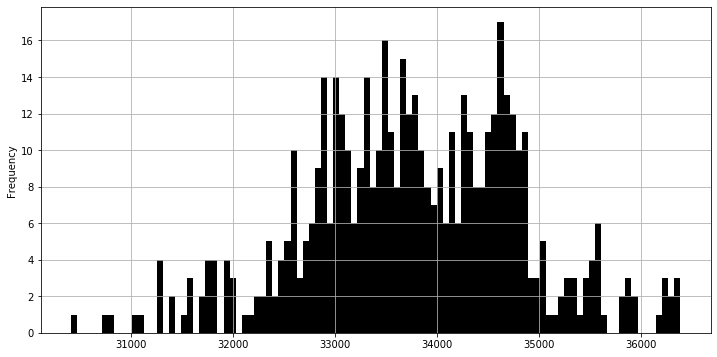

In [8]:
import pandas as pd
import numpy as np
from tzlocal import get_localzone
import requests
import json
from datetime import datetime
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.core.display import display, HTML

# Notebook settings
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('mode.chained_assignment', None)
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))
pd.set_option("precision", 12)
mytz = get_localzone()

def load_data_from_binance(coin_pair, time_interval):
    resp = requests.get('https://www.binance.com/api/v3/klines?symbol=' + coin_pair + '&interval=' + time_interval)
    df = pd.DataFrame(json.loads(resp.text))
    df = df[[0, 1, 2, 3, 4, 5]]
    df = df.rename(columns = { 0: 'Date', 1: 'Open', 2: 'High', 3: 'Low', 4: 'Close', 5: 'Volume' })

    df['High'] = df['High'].astype(float)
    df['Low'] = df['Low'].astype(float)
    df["Close"] = df['Close'].astype(float)
    df['Open'] = df['Open'].astype(float)
    df['Volume'] = df['Volume'].astype(float)
    df['Date'] =  pd.to_datetime(df['Date'], unit='ms').dt.tz_localize('UTC').dt.tz_convert(mytz).dt.strftime('%Y-%m-%d %H')
    df = df.set_index(pd.DatetimeIndex(df['Date']))

    return df

def plot_histogram(df, column):
    df[column].plot(kind='hist', bins=100, figsize=(12,6), color='black', grid=True)

df = load_data_from_binance('BTCUSDT', '1h')
plot_histogram(df, 'Close')

# At the time I run this code, the histogram has a bell shape. 
# Indicating that the prices between 32.5k to 34.7k are the most